## Twin-T 3 Port Analysis v0

filename: Twin-T_3_port_analysis_v0

variations of compoenet arrangements and feed back and grounding of R and C.


In [1]:
import random
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

In [2]:
C, R = symbols('C R')

## Three port analysis, variation 1


![](Twin-T_3_port_analysis_v0.png)

```
* C:\users\jeff64\My Documents\JupyterLab\Misc ipython notebooks\Buchla 295 10 Channel Comb Filter\LTSpice\Twin-T-variation-TP-5c.asc
R1 5 1 1
R2 2 4 1
R3 4 3 1
C1 4 1 1
C2 2 5 1
C3 5 3 1
V1 1 0 1
V2 2 0 1
V3 3 0 1
.backanno
.end
```


# Variation 5
Also see [1] figure 2. drawn differenly, but I thinks it's the same circuit. What is the impedance? What about two port parameters?

Also examine permintations in component arrangements. keep the numerical part of the reference designators in the same location.

Maybe move two port study to a different notebook. The configuration of Figure 1 has the Twin-T network in a three port arangement. Can a generalized therory be developed?  Replace all the elements with Z's, what does the topology say?

Rename two Port sch as Twin-T_n-port ?? and move these blocks of code to new notebook.

What are the permutations for Op Amp connections. What about OTA (VCCS) connections.


Capacitor only OTA configurations.

![](Twin-T-variation5.png)

In [143]:
example_net_list = '''
* Twin-T-variation5.asc
R1 3 1 1
R2 2 4 1
R3 4 0 1
C1 4 1 1
C2 2 3 1
C3 3 0 1
V1 1 0 1
'''

In [144]:
#| echo: true
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# N is the variation number
U_sym = solve(NE_sym,X)
H_sym = cancel(U_sym[v2]/U_sym[v1],s)

In [145]:
#| echo: false
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{2} + C_{2} R_{3}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3} + C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{1} + C_{2} R_{2} + C_{2} R_{3} + C_{3} R_{1}\right) + 1}$

Making the substitutions: $R_1=R_3=R$, $R_2=2R$, $R_4=5$, $R_5=R_6=2$, $C_1=C_3=C$ and $C_2=C/2$, we get:

In [146]:
sub_values = {R1:R, R2:R/2, R3:R, C1:C, C2:C/2, C3:C}
H_sym.subs(sub_values).simplify()

In [147]:
#| echo: false
H_sym = H_sym.subs(sub_values).simplify()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{7 C R s}{C^{2} R^{2} s^{2} + 9 C R s + 4}$

In [148]:
#| echo: false
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

In [149]:
H_sym_num = H_sym_num.expand().collect(s)

In [150]:
H_sym_num

In [151]:
H_sym_denom = H_sym_denom.expand().collect(s)

The numerator polynominal is:

In [152]:
#| echo: false
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=7 C R s$

In [153]:
#| echo: false
num_root_sym = solve(H_sym_num,s)
Markdown('${:s}$'.format(latex(num_root_sym)))

$\left[ 0\right]$

The denominator polynominal is:

In [154]:
#| echo: false
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C^{2} R^{2} s^{2} + 9 C R s + 4$

The roots of the denominator polynominal can found with SymPy.

In [155]:
#| echo: false
denom_root_sym = solve(H_sym_denom,s)
Markdown('${:s}$'.format(latex(denom_root_sym)))

$\left[ \frac{-9 - \sqrt{65}}{2 C R}, \  \frac{-9 + \sqrt{65}}{2 C R}\right]$

In [156]:
sub_values = {R:1,C:1/2}
H_sym.subs(sub_values)

In [157]:
#| echo: false
H_num, H_denom = fraction(H_sym.subs(sub_values)) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

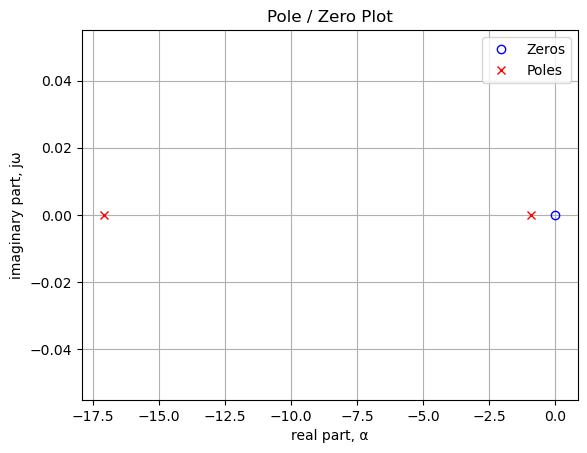

In [158]:
#| echo: false
#| fig-cap: fig cap
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [159]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
0.00            -17.06
                -0.94


The values of the poles network are the same a chosen above, thus validating the solution.

The magnitude and phase of the filter's transfer function is plotted below.

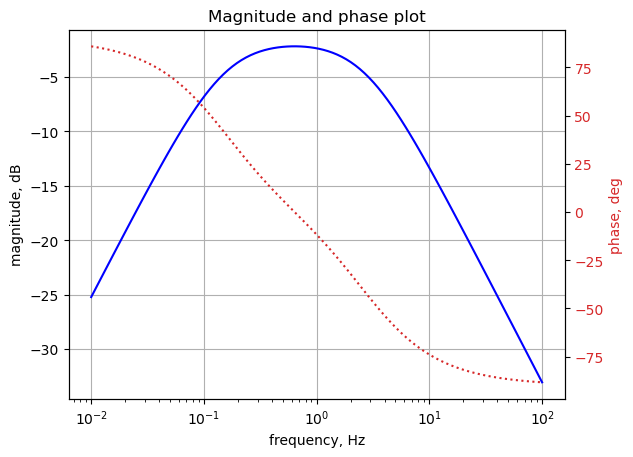

In [160]:
#| echo: false
#| fig-cap: fig cap

x = np.logspace(-2, 2, 100, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

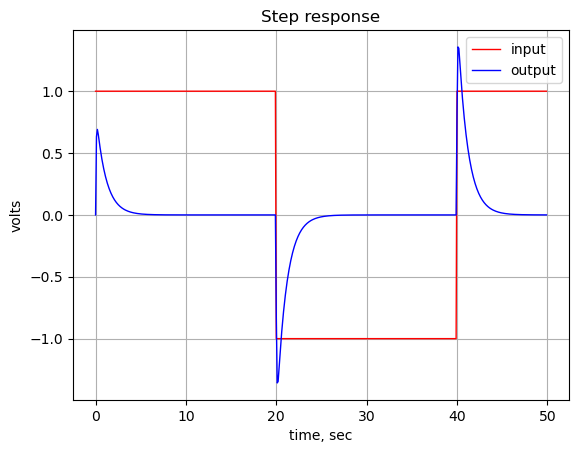

In [161]:
#| echo: false
#| fig-cap: fig cap

# define the time interval and create a square wave step waveform.
t = np.linspace(0, 50, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

# Variation 5a
R4 added to the circuit.  

![](Twin-T-variation5a.png)

In [162]:
example_net_list = '''
* Twin-T-variation5a.asc
R1 3 1 1
R2 2 4 1
R3 4 0 1
C1 4 1 1
C2 2 3 1
C3 3 0 1
V1 1 0 1
R4 2 0 1
'''

In [163]:
#| echo: true
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# N is the variation number
U_sym = solve(NE_sym,X)
H_sym = cancel(U_sym[v2]/U_sym[v1],s)

In [164]:
#| echo: false
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(C_{1} C_{2} R_{1} R_{3} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4} + C_{1} C_{3} R_{1} R_{3} R_{4}\right) + s \left(C_{1} R_{3} R_{4} + C_{2} R_{2} R_{4} + C_{2} R_{3} R_{4}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} R_{4} s^{3} + R_{2} + R_{3} + R_{4} + s^{2} \left(C_{1} C_{2} R_{1} R_{2} R_{3} + C_{1} C_{2} R_{1} R_{3} R_{4} + C_{1} C_{2} R_{2} R_{3} R_{4} + C_{1} C_{3} R_{1} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3} R_{4} + C_{2} C_{3} R_{1} R_{2} R_{4} + C_{2} C_{3} R_{1} R_{3} R_{4}\right) + s \left(C_{1} R_{2} R_{3} + C_{1} R_{3} R_{4} + C_{2} R_{1} R_{2} + C_{2} R_{1} R_{3} + C_{2} R_{1} R_{4} + C_{2} R_{2} R_{4} + C_{2} R_{3} R_{4} + C_{3} R_{1} R_{2} + C_{3} R_{1} R_{3} + C_{3} R_{1} R_{4}\right)}$

Making the substitutions: $R_1=R_3=R$, $R_2=2R$, $R_4=5$, $R_5=R_6=2$, $C_1=C_3=C$ and $C_2=C/2$, we get:

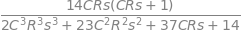

In [165]:
sub_values = {R1:R, R2:R/2, R3:R, R4:2*R, C1:C, C2:C/2, C3:C}
H_sym.subs(sub_values).simplify()

In [166]:
#| echo: false
H_sym = H_sym.subs(sub_values).simplify()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{14 C R s \left(C R s + 1\right)}{2 C^{3} R^{3} s^{3} + 23 C^{2} R^{2} s^{2} + 37 C R s + 14}$

In [167]:
#| echo: false
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

In [168]:
H_sym_num = H_sym_num.expand().collect(s)

In [169]:
H_sym_num

In [170]:
H_sym_denom = H_sym_denom.expand().collect(s)

The numerator polynominal is:

In [171]:
#| echo: false
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=14 C^{2} R^{2} s^{2} + 14 C R s$

In [172]:
#| echo: false
num_root_sym = solve(H_sym_num,s)
Markdown('${:s}$'.format(latex(num_root_sym)))

$\left[ 0, \  - \frac{1}{C R}\right]$

The denominator polynominal is:

In [173]:
#| echo: false
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=2 C^{3} R^{3} s^{3} + 23 C^{2} R^{2} s^{2} + 37 C R s + 14$

The roots of the denominator polynominal can found with SymPy.

In [174]:
#| echo: false
denom_root_sym = solve(H_sym_denom,s)
Markdown('${:s}$'.format(latex(denom_root_sym)))

$\left[ \frac{- \frac{23}{6} - \frac{307}{12 \left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{658 + \frac{3 \sqrt{136083} i}{8}}} - \frac{\left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{658 + \frac{3 \sqrt{136083} i}{8}}}{3}}{C R}, \  \frac{- \frac{23}{6} - \frac{\left(- \frac{1}{2} + \frac{\sqrt{3} i}{2}\right) \sqrt[3]{658 + \frac{3 \sqrt{136083} i}{8}}}{3} - \frac{307}{12 \left(- \frac{1}{2} + \frac{\sqrt{3} i}{2}\right) \sqrt[3]{658 + \frac{3 \sqrt{136083} i}{8}}}}{C R}, \  \frac{- \frac{23}{6} - \frac{\sqrt[3]{658 + \frac{3 \sqrt{136083} i}{8}}}{3} - \frac{307}{12 \sqrt[3]{658 + \frac{3 \sqrt{136083} i}{8}}}}{C R}\right]$

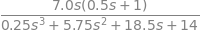

In [175]:
sub_values = {R:1,C:1/2}
H_sym.subs(sub_values)

In [176]:
#| echo: false
H_num, H_denom = fraction(H_sym.subs(sub_values)) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

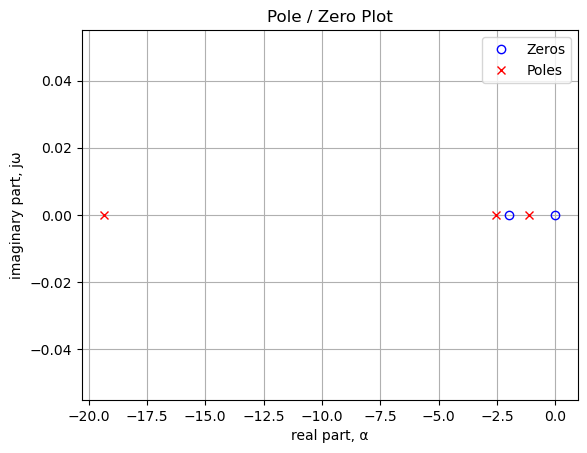

In [177]:
#| echo: false
#| fig-cap: fig cap
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [178]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
-2.00           -19.32
0.00            -2.54
                -1.14


The values of the poles network are the same a chosen above, thus validating the solution.

The magnitude and phase of the filter's transfer function is plotted below.

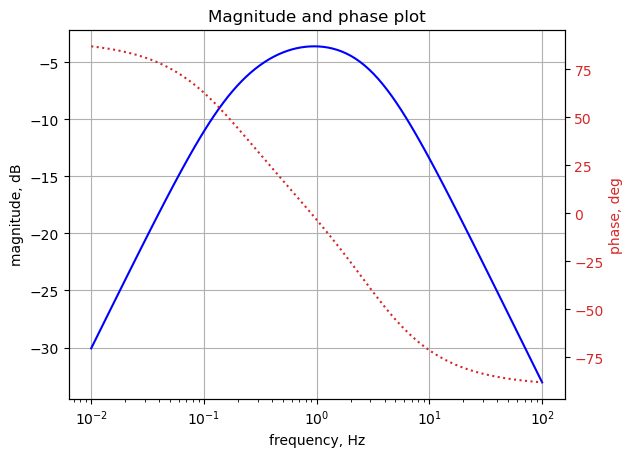

In [179]:
#| echo: false
#| fig-cap: fig cap

x = np.logspace(-2, 2, 100, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

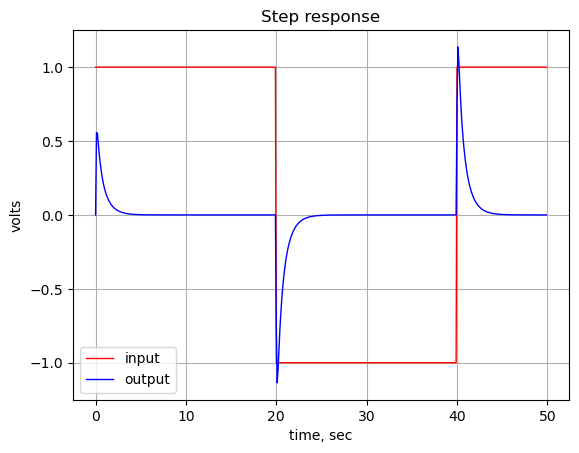

In [180]:
#| echo: false
#| fig-cap: fig cap

# define the time interval and create a square wave step waveform.
t = np.linspace(0, 50, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

# Variation 5b
R4 changed to a capacitor.

![](Twin-T-variation5b.png)



In [181]:
example_net_list = '''
* Twin-T-variation5b.asc
R1 3 1 1
R2 2 4 1
R3 4 0 1
C1 4 1 1
C2 2 3 1
C3 3 0 1
V1 1 0 1
C4 2 0 1
'''

In [182]:
#| echo: true
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
nominal_component_value = SymMNA.get_part_values(network_df)

# N is the variation number
U_sym = solve(NE_sym,X)
H_sym = cancel(U_sym[v2]/U_sym[v1],s)

In [183]:
#| echo: false
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{2} + C_{2} R_{3}\right)}{s^{3} \left(C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} + C_{1} C_{2} C_{4} R_{1} R_{2} R_{3} + C_{1} C_{3} C_{4} R_{1} R_{2} R_{3}\right) + s^{2} \left(C_{1} C_{2} R_{1} R_{3} + C_{1} C_{2} R_{2} R_{3} + C_{1} C_{3} R_{1} R_{3} + C_{1} C_{4} R_{2} R_{3} + C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3} + C_{2} C_{4} R_{1} R_{2} + C_{2} C_{4} R_{1} R_{3} + C_{3} C_{4} R_{1} R_{2} + C_{3} C_{4} R_{1} R_{3}\right) + s \left(C_{1} R_{3} + C_{2} R_{1} + C_{2} R_{2} + C_{2} R_{3} + C_{3} R_{1} + C_{4} R_{2} + C_{4} R_{3}\right) + 1}$

Making the substitutions: $R_1=R_3=R$, $R_2=2R$, $R_4=5$, $R_5=R_6=2$, $C_1=C_3=C$ and $C_2=C/2$, we get:

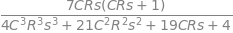

In [184]:
sub_values = {R1:R, R2:R/2, R3:R, C4:C, C1:C, C2:C/2, C3:C}
H_sym.subs(sub_values).simplify()

In [185]:
#| echo: false
H_sym = H_sym.subs(sub_values).simplify()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{7 C R s \left(C R s + 1\right)}{4 C^{3} R^{3} s^{3} + 21 C^{2} R^{2} s^{2} + 19 C R s + 4}$

In [186]:
#| echo: false
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

In [187]:
H_sym_num = H_sym_num.expand().collect(s)

In [188]:
H_sym_num

In [189]:
H_sym_denom = H_sym_denom.expand().collect(s)

The numerator polynominal is:

In [190]:
#| echo: false
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=7 C^{2} R^{2} s^{2} + 7 C R s$

In [191]:
#| echo: false
num_root_sym = solve(H_sym_num,s)
Markdown('${:s}$'.format(latex(num_root_sym)))

$\left[ 0, \  - \frac{1}{C R}\right]$

The denominator polynominal is:

In [192]:
#| echo: false
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=4 C^{3} R^{3} s^{3} + 21 C^{2} R^{2} s^{2} + 19 C R s + 4$

The roots of the denominator polynominal can found with SymPy.

In [193]:
#| echo: false
denom_root_sym = solve(H_sym_denom,s)
Markdown('${:s}$'.format(latex(denom_root_sym)))

$\left[ \frac{- \frac{7}{4} - \frac{71}{16 \left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{2943}{64} + \frac{3 \sqrt{27843} i}{32}}} - \frac{\left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{2943}{64} + \frac{3 \sqrt{27843} i}{32}}}{3}}{C R}, \  \frac{- \frac{7}{4} - \frac{\left(- \frac{1}{2} + \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{2943}{64} + \frac{3 \sqrt{27843} i}{32}}}{3} - \frac{71}{16 \left(- \frac{1}{2} + \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{2943}{64} + \frac{3 \sqrt{27843} i}{32}}}}{C R}, \  \frac{- \frac{7}{4} - \frac{\sqrt[3]{\frac{2943}{64} + \frac{3 \sqrt{27843} i}{32}}}{3} - \frac{71}{16 \sqrt[3]{\frac{2943}{64} + \frac{3 \sqrt{27843} i}{32}}}}{C R}\right]$

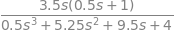

In [194]:
sub_values = {R:1,C:1/2}
H_sym.subs(sub_values)

In [195]:
#| echo: false
H_num, H_denom = fraction(H_sym.subs(sub_values)) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

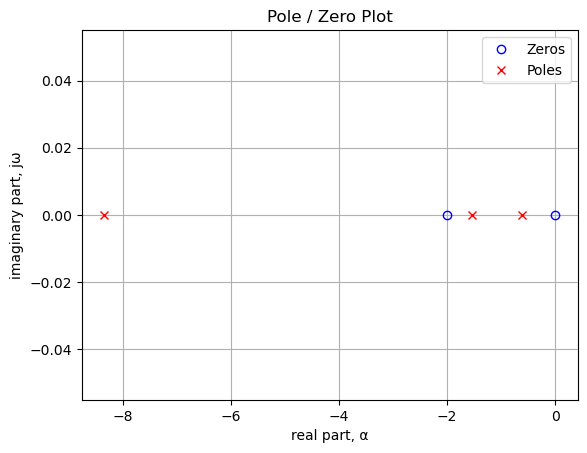

In [196]:
#| echo: false
#| fig-cap: fig cap
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [197]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i])
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
-2.00           -8.34
0.00            -1.54
                -0.62


The values of the poles network are the same a chosen above, thus validating the solution.

The magnitude and phase of the filter's transfer function is plotted below.

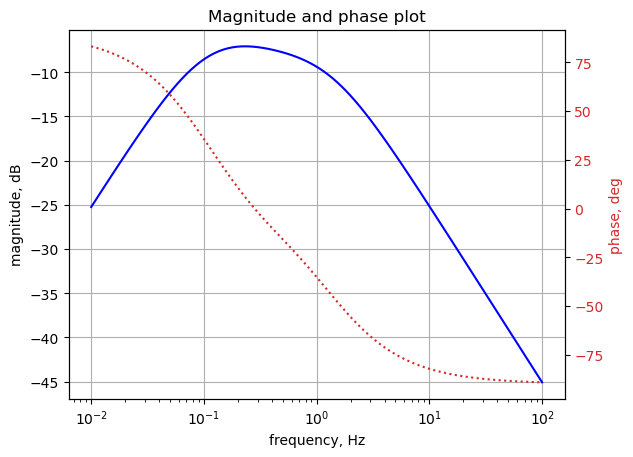

In [198]:
#| echo: false
#| fig-cap: fig cap

x = np.logspace(-2, 2, 100, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot
#ax1.set_ylim(-1,1)
ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

The step response is plotted below.

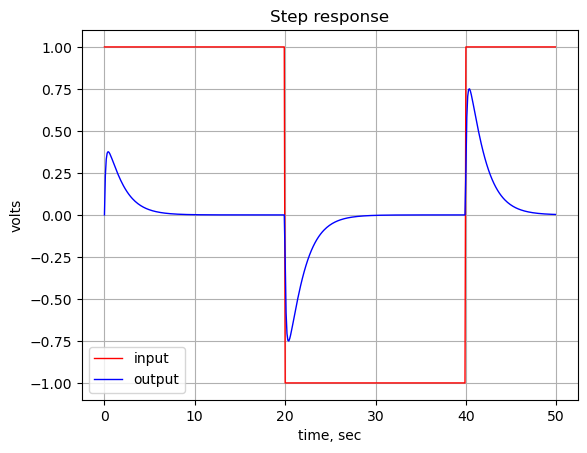

In [199]:
#| echo: false
#| fig-cap: fig cap

# define the time interval and create a square wave step waveform.
t = np.linspace(0, 50, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()